In [1]:
import numpy as np
import pandas as pd
np.random.seed(12345)
import matplotlib.pyplot as plt
plt.rc('figure', figsize=(10, 6))
PREVIOUS_MAX_ROWS = pd.options.display.max_rows
pd.options.display.max_rows = 20
np.set_printoptions(precision=4, suppress=True)

# 13.1 pandas 与建模代码的结合

In [3]:
data = pd.DataFrame({
    'x0': [1,2,3,4,5],
    'x1': [0.01, -0.01, 0.25, -4.1,0],
    'y': [-1.5,  0., 3.6, 1.3, -2]
})

In [4]:
data

,x0,x1,y
0,1,0.01,-1.5
1,2,-0.01,0.0
2,3,0.25,3.6
3,4,-4.10,1.3
4,5,0.00,-2.0


In [5]:
data.index

RangeIndex(start=0, stop=5, step=1)

In [6]:
data.columns

Index(['x0', 'x1', 'y'], dtype='object')

In [7]:
data.values

array([[ 1.  ,  0.01, -1.5 ],
       [ 2.  , -0.01,  0.  ],
       [ 3.  ,  0.25,  3.6 ],
       [ 4.  , -4.1 ,  1.3 ],
       [ 5.  ,  0.  , -2.  ]])

In [8]:
df2 = pd.DataFrame(data.values, columns=['one','two','three'])

In [9]:
df2

,one,two,three
0,1.0,0.01,-1.5
1,2.0,-0.01,0.0
2,3.0,0.25,3.6
3,4.0,-4.10,1.3
4,5.0,0.00,-2.0


In [10]:
df3 = data.copy()

In [11]:
df3['string'] = ['a','b','c','d','e']

In [12]:
df3

,x0,x1,y,string
0,1,0.01,-1.5,a
1,2,-0.01,0.0,b
2,3,0.25,3.6,c
3,4,-4.10,1.3,d
4,5,0.00,-2.0,e


In [13]:
df3.values

array([[1, 0.01, -1.5, 'a'],
       [2, -0.01, 0.0, 'b'],
       [3, 0.25, 3.6, 'c'],
       [4, -4.1, 1.3, 'd'],
       [5, 0.0, -2.0, 'e']], dtype=object)

In [14]:
model_cols = ['x0','x1']

In [15]:
data.loc[:, model_cols].values

array([[ 1.  ,  0.01],
       [ 2.  , -0.01],
       [ 3.  ,  0.25],
       [ 4.  , -4.1 ],
       [ 5.  ,  0.  ]])

In [18]:
data['category'] = pd.Categorical(['a','b','a','a','b'],
                                 categories=['a','b'])

In [27]:
data

,x0,x1,y,category
0,1,0.01,-1.5,a
1,2,-0.01,0.0,b
2,3,0.25,3.6,a
3,4,-4.10,1.3,a
4,5,0.00,-2.0,b


In [20]:
data.category

0    a
1    b
2    a
3    a
4    b
Name: category, dtype: category
Categories (2, object): ['a', 'b']

In [21]:
dummies = pd.get_dummies(data.category, prefix='category')

In [22]:
dummies

,category_a,category_b
0,1,0
1,0,1
2,1,0
3,1,0
4,0,1


In [24]:
data_with_dummies = data.drop('category',axis=1)

In [25]:
data_with_dummies.join(dummies)

,x0,x1,y,category_a,category_b
0,1,0.01,-1.5,1,0
1,2,-0.01,0.0,0,1
2,3,0.25,3.6,1,0
3,4,-4.10,1.3,1,0
4,5,0.00,-2.0,0,1


In [26]:
pd.get_dummies(data)

,x0,x1,y,category_a,category_b
0,1,0.01,-1.5,1,0
1,2,-0.01,0.0,0,1
2,3,0.25,3.6,1,0
3,4,-4.10,1.3,1,0
4,5,0.00,-2.0,0,1


# 13.2 使用 Patsy 创建模型描述

In [29]:
data = data.drop('category', axis=1)

In [30]:
data

,x0,x1,y
0,1,0.01,-1.5
1,2,-0.01,0.0
2,3,0.25,3.6
3,4,-4.10,1.3
4,5,0.00,-2.0


In [31]:
import patsy

In [32]:
y, x = patsy.dmatrices('y ~ x0 + x1', data)

In [33]:
y

DesignMatrix with shape (5, 1)
     y
  -1.5
   0.0
   3.6
   1.3
  -2.0
  Terms:
    'y' (column 0)

In [34]:
x

DesignMatrix with shape (5, 3)
  Intercept  x0     x1
          1   1   0.01
          1   2  -0.01
          1   3   0.25
          1   4  -4.10
          1   5   0.00
  Terms:
    'Intercept' (column 0)
    'x0' (column 1)
    'x1' (column 2)

In [35]:
np.asarray?

In [36]:
np.asarray(y)

array([[-1.5],
       [ 0. ],
       [ 3.6],
       [ 1.3],
       [-2. ]])

In [38]:
np.asarray(x)

array([[ 1.  ,  1.  ,  0.01],
       [ 1.  ,  2.  , -0.01],
       [ 1.  ,  3.  ,  0.25],
       [ 1.  ,  4.  , -4.1 ],
       [ 1.  ,  5.  ,  0.  ]])

In [41]:
patsy.dmatrices('y ~ x0 + x1 + 0', data)[1]

DesignMatrix with shape (5, 2)
  x0     x1
   1   0.01
   2  -0.01
   3   0.25
   4  -4.10
   5   0.00
  Terms:
    'x0' (column 0)
    'x1' (column 1)

In [42]:
coef, resid, _, _ = np.linalg.lstsq(x,y)

<ipython-input-42-222c0201b776>:1: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  coef, resid, _, _ = np.linalg.lstsq(x,y)


In [43]:
np.linalg.lstsq?

In [44]:
coef

array([[ 0.3129],
       [-0.0791],
       [-0.2655]])

In [45]:
coef = pd.Series(coef.squeeze(), index = x.design_info.column_names)

In [46]:
coef

Intercept    0.312910
x0          -0.079106
x1          -0.265464
dtype: float64

## 13.2.1 Patsy 公式中的数据转换

In [48]:
y,X = patsy.dmatrices('y ~ x0 + np.log(np.abs(x1) + 1)', data)

In [49]:
y

DesignMatrix with shape (5, 1)
     y
  -1.5
   0.0
   3.6
   1.3
  -2.0
  Terms:
    'y' (column 0)

In [50]:
x

DesignMatrix with shape (5, 3)
  Intercept  x0     x1
          1   1   0.01
          1   2  -0.01
          1   3   0.25
          1   4  -4.10
          1   5   0.00
  Terms:
    'Intercept' (column 0)
    'x0' (column 1)
    'x1' (column 2)

In [51]:
y, x = patsy.dmatrices('y ~ I(x0 + x1)', data)

In [52]:
y

DesignMatrix with shape (5, 1)
     y
  -1.5
   0.0
   3.6
   1.3
  -2.0
  Terms:
    'y' (column 0)

In [53]:
x

DesignMatrix with shape (5, 2)
  Intercept  I(x0 + x1)
          1        1.01
          1        1.99
          1        3.25
          1       -0.10
          1        5.00
  Terms:
    'Intercept' (column 0)
    'I(x0 + x1)' (column 1)

## 13.2.2 分类数据与 Patsy

In [57]:
data = pd.DataFrame({
    'key1': 'a a b b a b a b'.split(),
    'key2': [0,1,0,1,0,1,0,0],
    'v1': [1,2,3,4,5,6,7,8],
    'v2': [-1,0,2.5,-0.5,4.0,-1.2,0.2,-1.7]
})

In [58]:
data

,key1,key2,v1,v2
0,a,0,1,-1.0
1,a,1,2,0.0
2,b,0,3,2.5
3,b,1,4,-0.5
4,a,0,5,4.0
5,b,1,6,-1.2
6,a,0,7,0.2
7,b,0,8,-1.7


In [59]:
y, X = patsy.dmatrices('v2 ~ key1', data)

In [60]:
y

DesignMatrix with shape (8, 1)
    v2
  -1.0
   0.0
   2.5
  -0.5
   4.0
  -1.2
   0.2
  -1.7
  Terms:
    'v2' (column 0)

In [61]:
X

DesignMatrix with shape (8, 2)
  Intercept  key1[T.b]
          1          0
          1          0
          1          1
          1          1
          1          0
          1          1
          1          0
          1          1
  Terms:
    'Intercept' (column 0)
    'key1' (column 1)

In [62]:
y, X = patsy.dmatrices('v2 ~ key1 + 0', data)

In [63]:
X

DesignMatrix with shape (8, 2)
  key1[a]  key1[b]
        1        0
        1        0
        0        1
        0        1
        1        0
        0        1
        1        0
        0        1
  Terms:
    'key1' (columns 0:2)

In [64]:
y, x = patsy.dmatrices('v2 ~ C(key2)', data)

In [65]:
y

DesignMatrix with shape (8, 1)
    v2
  -1.0
   0.0
   2.5
  -0.5
   4.0
  -1.2
   0.2
  -1.7
  Terms:
    'v2' (column 0)

In [66]:
x

DesignMatrix with shape (8, 2)
  Intercept  C(key2)[T.1]
          1             0
          1             1
          1             0
          1             1
          1             0
          1             1
          1             0
          1             0
  Terms:
    'Intercept' (column 0)
    'C(key2)' (column 1)

In [67]:
y, x = patsy.dmatrices('v2 ~ key2', data)

In [69]:
data['key2'] = data['key2'].map({0: 'zero', 1: 'one'})

In [70]:
data

,key1,key2,v1,v2
0,a,zero,1,-1.0
1,a,one,2,0.0
2,b,zero,3,2.5
3,b,one,4,-0.5
4,a,zero,5,4.0
5,b,one,6,-1.2
6,a,zero,7,0.2
7,b,zero,8,-1.7


In [71]:
y,x = patsy.dmatrices('v2 ~ key1 + key2', data)

In [72]:
x

DesignMatrix with shape (8, 3)
  Intercept  key1[T.b]  key2[T.zero]
          1          0             1
          1          0             0
          1          1             1
          1          1             0
          1          0             1
          1          1             0
          1          0             1
          1          1             1
  Terms:
    'Intercept' (column 0)
    'key1' (column 1)
    'key2' (column 2)

In [73]:
y, x = patsy.dmatrices('v2 ~ key1 + key2 + key1:key2', data)

In [74]:
x

DesignMatrix with shape (8, 4)
  Intercept  key1[T.b]  key2[T.zero]  key1[T.b]:key2[T.zero]
          1          0             1                       0
          1          0             0                       0
          1          1             1                       1
          1          1             0                       0
          1          0             1                       0
          1          1             0                       0
          1          0             1                       0
          1          1             1                       1
  Terms:
    'Intercept' (column 0)
    'key1' (column 1)
    'key2' (column 2)
    'key1:key2' (column 3)

# 13.3 statsmodels 介绍

## 13.3.1 评估线性模型

In [2]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [3]:
def dnorm(mean, variance, size=1):
    if isinstance(size, int):
        size = size,
    return mean + np.sqrt(variance) * np.random.randn(*size)

In [4]:
np.random.seed(12345)

In [5]:
N = 100

In [6]:
X = np.c_[dnorm(0, 0.4, size=N),
         dnorm(0, 0.6, size=N),
         dnorm(0, 0.2, size=N)]

In [7]:
X

array([[-0.1295, -1.2128,  0.5042],
       [ 0.3029, -0.4357, -0.2542],
       [-0.3285, -0.0253,  0.1384],
       [-0.3515, -0.7196, -0.2582],
       [ 1.2433, -0.3738, -0.5226],
       [ 0.8813, -0.0281, -0.369 ],
       [ 0.0588,  0.8485, -1.1826],
       [ 0.1782,  0.7598, -0.0684],
       [ 0.4864, -0.4566, -0.3363],
       [ 0.7883,  1.2252, -0.0593],
       [ 0.637 , -0.4096,  0.6517],
       [-0.8198,  0.354 ,  0.2726],
       [ 0.1739,  0.7204, -0.2208],
       [ 0.1448, -1.2156,  0.5545],
       [ 0.8557, -0.792 , -0.0607],
       [ 0.5606, -0.312 ,  0.6395],
       [-1.2659,  0.1708, -0.3787],
       [-0.2352, -0.1498,  0.2698],
       [ 1.0556,  0.5183,  0.5651],
       [-0.2774, -1.2773, -0.1143],
       [-0.3414, -1.745 , -0.1993],
       [ 0.3017, -0.9038,  0.2095],
       [ 2.0548,  0.2739, -0.43  ],
       [-0.6459,  0.5439, -0.8159],
       [-0.365 , -0.2127,  0.2797],
       [ 0.0785, -0.1078,  0.4574],
       [ 0.1914,  0.0834,  0.4953],
       [ 0.3313, -0.4698,  0

In [8]:
eps = dnorm(0, 0.1, size=N)

In [9]:
eps

array([ 0.5525, -0.446 , -0.1196, -0.1094,  0.1202,  0.0598,  0.4185,
       -0.7161, -0.2893, -0.1515,  0.3311,  0.2922, -0.0361,  0.1283,
        0.0912, -0.1375,  0.1134, -0.1228,  0.6732,  0.4458, -0.0333,
        0.2215,  0.6618, -0.0433, -0.2942,  0.1036,  0.412 , -0.4457,
       -0.0456, -0.2266,  0.0328, -0.473 , -0.3715,  0.8266, -0.218 ,
       -0.2377,  0.2012, -0.3661,  0.1944,  0.323 ,  0.2113, -0.256 ,
       -0.2872,  0.4782,  0.0301,  0.3746,  0.2014, -0.1705, -0.0174,
       -0.3592, -0.0539, -0.3662,  0.3493,  0.2006,  0.3983,  0.3051,
       -0.1374, -0.2782, -0.2197,  0.3878,  0.1446,  0.0366,  0.3207,
       -0.3589, -0.0833,  0.4131, -0.5094, -0.3246,  0.3926, -0.0496,
       -0.7745, -0.327 ,  0.5058,  0.1499,  0.0479, -0.1715, -0.1504,
        0.0336, -0.4137,  0.6872,  0.1785, -0.0602, -0.29  , -0.3086,
        0.6996,  0.0234,  0.5751, -0.5001, -0.2449,  0.1749,  0.0335,
        1.242 , -0.0807,  0.2701, -0.1154,  0.0415, -0.2206,  0.4224,
       -0.0478,  0.1

In [10]:
beta = [0.1, 0.3, 0.5]

In [11]:
y = np.dot(X, beta) + eps

In [12]:
X_model = sm.add_constant(X)

In [13]:
X_model

array([[ 1.    , -0.1295, -1.2128,  0.5042],
       [ 1.    ,  0.3029, -0.4357, -0.2542],
       [ 1.    , -0.3285, -0.0253,  0.1384],
       [ 1.    , -0.3515, -0.7196, -0.2582],
       [ 1.    ,  1.2433, -0.3738, -0.5226],
       [ 1.    ,  0.8813, -0.0281, -0.369 ],
       [ 1.    ,  0.0588,  0.8485, -1.1826],
       [ 1.    ,  0.1782,  0.7598, -0.0684],
       [ 1.    ,  0.4864, -0.4566, -0.3363],
       [ 1.    ,  0.7883,  1.2252, -0.0593],
       [ 1.    ,  0.637 , -0.4096,  0.6517],
       [ 1.    , -0.8198,  0.354 ,  0.2726],
       [ 1.    ,  0.1739,  0.7204, -0.2208],
       [ 1.    ,  0.1448, -1.2156,  0.5545],
       [ 1.    ,  0.8557, -0.792 , -0.0607],
       [ 1.    ,  0.5606, -0.312 ,  0.6395],
       [ 1.    , -1.2659,  0.1708, -0.3787],
       [ 1.    , -0.2352, -0.1498,  0.2698],
       [ 1.    ,  1.0556,  0.5183,  0.5651],
       [ 1.    , -0.2774, -1.2773, -0.1143],
       [ 1.    , -0.3414, -1.745 , -0.1993],
       [ 1.    ,  0.3017, -0.9038,  0.2095],
       [ 1

In [14]:
model = sm.OLS(y, X_model)

In [15]:
result = model.fit()

In [16]:
result.params

array([0.0336, 0.1761, 0.2248, 0.5148])

In [17]:
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.435
Model:                            OLS   Adj. R-squared:                  0.418
Method:                 Least Squares   F-statistic:                     24.68
Date:                Mon, 17 May 2021   Prob (F-statistic):           6.37e-12
Time:                        10:36:56   Log-Likelihood:                -33.835
No. Observations:                 100   AIC:                             75.67
Df Residuals:                      96   BIC:                             86.09
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0336      0.035      0.952      0.3

In [18]:
data = pd.DataFrame(X, columns=['col0', 'col1', 'col2'])

In [19]:
data['y']=y

In [20]:
data.head()

,col0,col1,col2,y
0,-0.129468,-1.212753,0.504225,0.427863
1,0.302910,-0.435742,-0.254180,-0.673480
2,-0.328522,-0.025302,0.138351,-0.090878
3,-0.351475,-0.719605,-0.258215,-0.489494
4,1.243269,-0.373799,-0.522629,-0.128941


In [21]:
results = smf.ols('y ~ col0 + col1 + col2', data=data).fit()

In [22]:
results.params

Intercept    0.033559
col0         0.176149
col1         0.224826
col2         0.514808
dtype: float64

In [23]:
results.tvalues

Intercept    0.952188
col0         3.319754
col1         4.850730
col2         6.303971
dtype: float64

In [24]:
results.predict(data[:5])

0   -0.002327
1   -0.141904
2    0.041226
3   -0.323070
4   -0.100535
dtype: float64

## 13.3.2 评估时间序列处理

In [25]:
# 。。。。。。。。

# 13.4 scikit-learn 介绍

In [26]:
train = pd.read_csv('datasets/titanic/train.csv')

In [27]:
test = pd.read_csv('datasets/titanic/test.csv')

In [28]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [29]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [34]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [35]:
test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [38]:
imput_value = train['Age'].median()

In [39]:
imput_value

28.0

In [40]:
train['Age'] = train['Age'].fillna(imput_value)

In [41]:
test['Age'] = test['Age'].fillna(imput_value)

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [52]:
train['isfemale'] = (train['Sex'] != 'female').astype('int64')

In [53]:
train.isfemale

0      1
1      0
2      0
3      0
4      1
      ..
886    1
887    0
888    0
889    1
890    1
Name: isfemale, Length: 891, dtype: int64

In [54]:
test['isfemale'] = (test['Sex'] != 'female').astype('int64')

In [55]:
test

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,isfemale
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,1
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,0
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,1
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,1
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,0
...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,28.0,0,0,A.5. 3236,8.0500,NaN,S,1
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C,0
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S,1
416,1308,3,"Ware, Mr. Frederick",male,28.0,0,0,359309,8.0500,NaN,S,1


In [56]:
predictors = ['Pclass','isfemale','Age']

In [57]:
X_train = train[predictors][:-100].values

In [61]:
y_train = train['Survived'][:-100].values

In [62]:
X_test = train[predictors][-100:].values

In [63]:
X_train

array([[ 3.,  1., 22.],
       [ 1.,  0., 38.],
       [ 3.,  0., 26.],
       ...,
       [ 3.,  1.,  1.],
       [ 1.,  1., 46.],
       [ 3.,  1., 28.]])

In [65]:
y_train[:5]

array([0, 1, 1, 1, 0], dtype=int64)

In [66]:
from sklearn.linear_model import LogisticRegression

In [67]:
model = LogisticRegression()

In [68]:
model.fit(X_train, y_train)

LogisticRegression()

In [69]:
y_predict = model.predict(X_test)

In [71]:
y_predict[:10]

array([0, 1, 0, 0, 0, 1, 1, 0, 1, 0], dtype=int64)

In [82]:
train.Survived[-100:].sum()

36

In [81]:
y_predict.sum()

36

In [83]:
train.Survived[-100:]

791    0
792    0
793    0
794    0
795    0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 100, dtype: int64

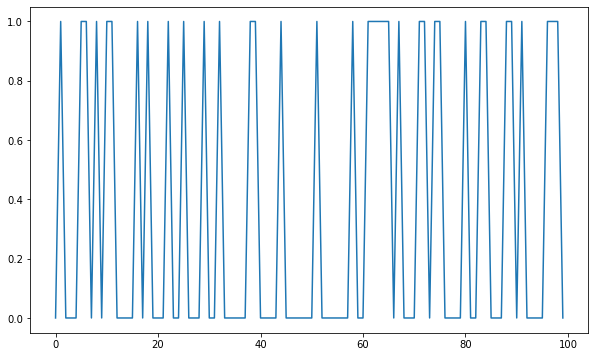

In [101]:
plt.plot(y_predict)

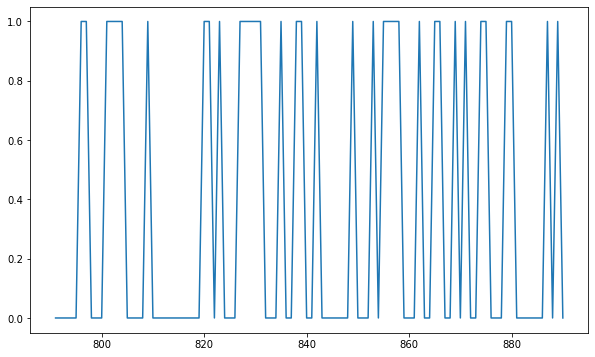

In [90]:
plt.plot(train.Survived[-100:])

In [102]:
from sklearn.linear_model import LogisticRegressionCV

In [103]:
model_cv = LogisticRegressionCV()

In [104]:
model_cv.fit(X_train, y_train)

LogisticRegressionCV()

In [105]:
model_cv.predict(X_test)

array([0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1,
       0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0,
       1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0], dtype=int64)

In [106]:
y_predict

array([0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1,
       0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0,
       1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0], dtype=int64)

In [107]:
from sklearn.model_selection import cross_val_score

In [108]:
model = LogisticRegression(C=10)

In [109]:
scores = cross_val_score(model, X_train, y_train, cv=4)

In [111]:
scores

array([0.7828, 0.8131, 0.7576, 0.7868])

In [112]:
scores.mean()

0.7850843459980517